c:\Users\rafae\PycharmProjects\MSW_Zapoctove_ulohy\MSW_Zapoctove_ulohy\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


[0.001999378204345703, 0.0, 0.0, 0.0009996891021728516, 0.0, 0.0010001659393310547, 0.0, 0.0010008811950683594, 0.00099945068359375, 0.0, 0.001001119613647461, 0.0010044574737548828, 0.0009987354278564453, 0.0010006427764892578, 0.0009992122650146484, 0.0009996891021728516, 0.006003618240356445, 0.003997325897216797, 0.0040013790130615234, 0.004998683929443359, 0.0050013065338134766, 0.004998207092285156, 0.006001710891723633, 0.0050008296966552734, 0.009000062942504883, 0.009002447128295898, 0.00899958610534668, 0.007999420166015625, 0.009001970291137695, 0.009998321533203125, 0.010003805160522461, 0.009999990463256836, 0.011002779006958008, 0.01099848747253418, 0.012001514434814453, 0.011997222900390625, 0.012998580932617188, 0.01300048828125, 0.012998342514038086, 0.012999773025512695, 0.013003110885620117, 0.014000892639160156, 0.01399993896484375, 0.015002727508544922, 0.013999462127685547, 0.015000343322753906, 0.015998125076293945, 0.015001058578491211, 0.017998695373535156, 0.0

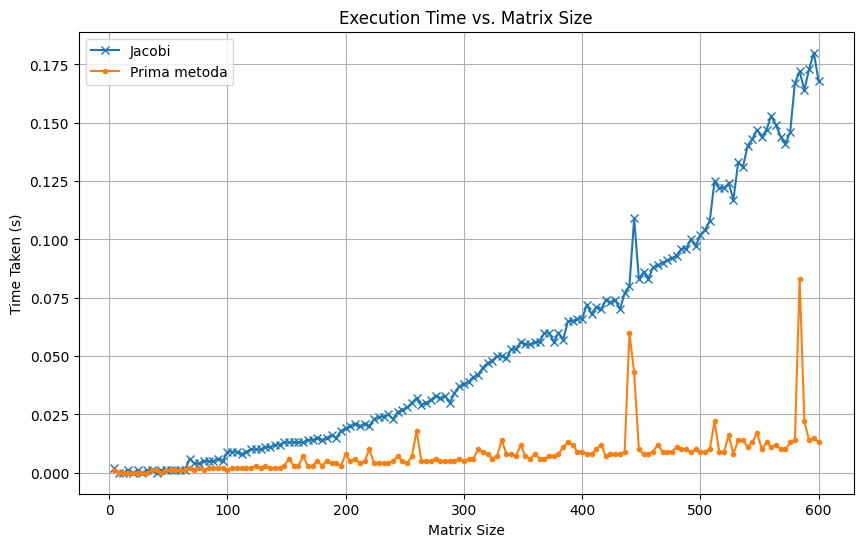

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt


a = []
b = []
times_jacobi = []
times_prima_metoda = []
matrix_sizes = np.arange(4, 601, 4)


def jacobi(a, b, niteraci, x0=None):
    if x0 is None:
        x0 = np.ones((len(a), 1))
    start_time = time.time()
    x = x0
    D = np.diag(a)
    a_except_diagonal = a - np.diag(D)
    for i in range(niteraci):
        x = (b - np.matmul(a_except_diagonal, x)) / D
    end_time = time.time()
    times_jacobi.append(end_time - start_time)
    return x


def prima_metoda(a, b):
    start_time = time.time()

    x = np.linalg.solve(a, b)
    end_time = time.time()
    times_prima_metoda.append(end_time - start_time)
    return x

# Bohužel nevím, jak zahrnout 0 do maticy, proto se tomu vyhneme. Cílem úkolu je zjistit, která metoda je vhodnější pro malé a velké matice.
# Našel jsem metod nazývaný Rozklad jediných hodnot (SVD), ale zatím jsem se do ní nezabýval.


for size in matrix_sizes:
    upper_bound = 10
    lower_bound = -10
    positive_float = np.random.uniform(0.0001, upper_bound)
    negative_float = np.random.uniform(lower_bound, -0.0001)
    a1 = np.random.choice([positive_float, negative_float], size=(size, size))
    b1 = np.random.choice([positive_float, negative_float], size=(size, 1))
    b1 = b1.reshape(-1, 1)
    while np.linalg.det(a1) == 0:
        a1 = np.random.choice([positive_float, negative_float], size=(size, size))
    a.append(a1)
    b.append(b1)


for matrix, matrix1 in zip(a, b):
    a_array = np.array(matrix)
    b_array = np.array(matrix1)
    jacobi(a_array, b_array, 50)
    prima_metoda(a_array, b_array)

print(times_jacobi)
print("prima metoda vysledky:", times_prima_metoda)

plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, times_jacobi, label='Jacobi', marker='x')
plt.plot(matrix_sizes, times_prima_metoda, label='Prima metoda', marker='.')
plt.xlabel('Matrix Size')
plt.ylabel('Time Taken (s)')
plt.title('Execution Time vs. Matrix Size')
plt.legend()
plt.grid(True)

plt.show()